In [1543]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [1544]:
df=pd.read_csv("./kc_house_data.csv",index_col="id")

In [1545]:
df_og=df.copy()

In [1546]:
df.shape

(21613, 20)

In [1547]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113


In [1548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 1

Change from object to datetime

In [1549]:
df["date"]=pd.to_datetime(df["date"])

In [1550]:
df.drop(columns=["lat","long","zipcode"],inplace=True)

In [1551]:
df_arr=df.reindex(sorted(df.columns),axis=1)
df_arr

,bathrooms,bedrooms,condition,date,floors,grade,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated
id,,,,,,,,,,,,,,,,,
7129300520,1.00,3,3,2014-10-13,1.0,7,221900.0,1180,0,1180,1340,5650,5650,0,0,1955,0
6414100192,2.25,3,3,2014-12-09,2.0,7,538000.0,2170,400,2570,1690,7242,7639,0,0,1951,1991
5631500400,1.00,2,3,2015-02-25,1.0,6,180000.0,770,0,770,2720,10000,8062,0,0,1933,0
2487200875,3.00,4,5,2014-12-09,1.0,7,604000.0,1050,910,1960,1360,5000,5000,0,0,1965,0
1954400510,2.00,3,3,2015-02-18,1.0,8,510000.0,1680,0,1680,1800,8080,7503,0,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2.50,3,3,2014-05-21,3.0,8,360000.0,1530,0,1530,1530,1131,1509,0,0,2009,0
6600060120,2.50,4,3,2015-02-23,2.0,8,400000.0,2310,0,2310,1830,5813,7200,0,0,2014,0
1523300141,0.75,2,3,2014-06-23,2.0,7,402101.0,1020,0,1020,1020,1350,2007,0,0,2009,0


In [1552]:
df.duplicated().sum()

0

In [1553]:
# age = []
# for index in df.index:
#     if df["yr_renovated"].loc[index].all() == 0:
#         age1 = 2023 - df["yr_built"].loc[index]
#     else:
#         age1 = 2023 - df["yr_renovated"].loc[index]
#     age.append(age1)
# pass

In [1554]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,4760,101930
1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,2238,6819
2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,1650,9711
2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,1780,8113


Renovated House

In [1555]:
yr_reno=df["yr_renovated"].replace(0,np.nan)
yr_reno.value_counts().sum()

914

Uniques of categorical 

In [1556]:
df_check = df[
    [
        "date",
        "price",
        "bathrooms",
        "bedrooms",
        "sqft_living",
        "sqft_lot",
        "floors",
        "waterfront",
        "view",
        "condition",
        "grade",
        "sqft_above",
        "sqft_basement",
        "yr_built",
        "yr_renovated",
        "sqft_living15",
        "sqft_lot15",
    ]
].replace(0, np.nan)

In [1557]:
df_check.head()

,date,price,bathrooms,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,1.00,3.0,1180,5650,1.0,NaN,NaN,3,7,1180,NaN,1955,NaN,1340,5650
6414100192,2014-12-09,538000.0,2.25,3.0,2570,7242,2.0,NaN,NaN,3,7,2170,400.0,1951,1991.0,1690,7639
5631500400,2015-02-25,180000.0,1.00,2.0,770,10000,1.0,NaN,NaN,3,6,770,NaN,1933,NaN,2720,8062
2487200875,2014-12-09,604000.0,3.00,4.0,1960,5000,1.0,NaN,NaN,5,7,1050,910.0,1965,NaN,1360,5000
1954400510,2015-02-18,510000.0,2.00,3.0,1680,8080,1.0,NaN,NaN,3,8,1680,NaN,1987,NaN,1800,7503


In [1558]:
df_check.isna().sum()

date                 0
price                0
bathrooms           10
bedrooms            13
sqft_living          0
sqft_lot             0
floors               0
waterfront       21450
view             19489
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated     20699
sqft_living15        0
sqft_lot15           0
dtype: int64

In [1559]:
df_check.nunique()

date              372
price            4028
bathrooms          29
bedrooms           12
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          1
view                4
condition           5
grade              12
sqft_above        946
sqft_basement     305
yr_built          116
yr_renovated       69
sqft_living15     777
sqft_lot15       8689
dtype: int64

With the result of nunique we can see that we may need to only replace 0 with nan for the numerical variable and keep the categorical ones as it is

In [1560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  sqft_livin

In [1561]:
# df_cate = df[["waterfront", "view", "condition", "grade"]].astype("category")

In [1562]:
# df_cate.info()

In [1563]:
# df_cate.isna().sum()

In [1564]:
# df_date=df["date"]

In [1565]:
df[
    [
        "price",
        "bathrooms",
        "bedrooms",
        "floors",
        "sqft_above",
        "sqft_basement",
        "yr_built",
        "yr_renovated",
        "sqft_living15",
        "sqft_lot15",
    ]
] = df[
    [
        "price",
        "bathrooms",
        "bedrooms",
        "floors",
        "sqft_above",
        "sqft_basement",
        "yr_built",
        "yr_renovated",
        "sqft_living15",
        "sqft_lot15",
    ]
].replace(
    to_replace=0, value=np.nan
)

In [1566]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,NaN,1955,NaN,1340,5650
6414100192,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1951,1991.0,1690,7639
5631500400,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,NaN,1933,NaN,2720,8062
2487200875,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,1965,NaN,1360,5000
1954400510,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,NaN,1987,NaN,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,NaN,2009,NaN,1530,1509
6600060120,2015-02-23,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,NaN,2014,NaN,1830,7200
1523300141,2014-06-23,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,NaN,2009,NaN,1020,2007


In [1567]:
df.isna().sum()

date                 0
price                0
bedrooms            13
bathrooms           10
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated     20699
sqft_living15        0
sqft_lot15           0
dtype: int64

In [1568]:
# df["basement"]=df["sqft_basement"].notna()*int(1)

In [1569]:
# df["renovated"]=df["yr_renovated"].notna()*int(1)

In [1570]:
df["age"]=2023-df["yr_built"]

In [1571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21600 non-null  float64       
 3   bathrooms      21603 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  8487 non-null   float64       
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   914 non-null    float64       
 15  sqft_livin

In [1572]:
# df.drop(columns=["sqft_basement","yr_renovated","yr_built"],inplace=True)

In [1573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21600 non-null  float64       
 3   bathrooms      21603 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  8487 non-null   float64       
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   914 non-null    float64       
 15  sqft_livin

In [1574]:
df["bedrooms"].isna().sum()

13

In [1575]:
df.loc[df["bathrooms"]==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,age
id,,,,,,,,,,,,,,,,,,


In [1576]:
df.loc[df["bedrooms"].isna()]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,age
id,,,,,,,,,,,,,,,,,,
6306400140,2014-06-12,1095000.0,NaN,NaN,3064,4764,3.5,0,2,3,7,3064,NaN,1990,NaN,2360,4000,33
3918400017,2015-02-05,380000.0,NaN,NaN,1470,979,3.0,0,2,3,8,1470,NaN,2006,NaN,1470,1399,17
1453602309,2014-08-05,288000.0,NaN,1.50,1430,1650,3.0,0,0,3,7,1430,NaN,1999,NaN,1430,1650,24
6896300380,2014-10-02,228000.0,NaN,1.00,390,5900,1.0,0,0,2,4,390,NaN,1953,NaN,2170,6000,70
2954400190,2014-06-24,1295650.0,NaN,NaN,4810,28008,2.0,0,0,3,12,4810,NaN,1990,NaN,4740,35061,33
2569500210,2014-11-17,339950.0,NaN,2.50,2290,8319,2.0,0,0,3,8,2290,NaN,1985,NaN,2500,8751,38
2310060040,2014-09-25,240000.0,NaN,2.50,1810,5669,2.0,0,0,3,7,1810,NaN,2003,NaN,1810,5685,20
3374500520,2015-04-29,355000.0,NaN,NaN,2460,8049,2.0,0,0,3,8,2460,NaN,1990,NaN,2520,8050,33
7849202190,2014-12-23,235000.0,NaN,NaN,1470,4800,2.0,0,0,3,7,1470,NaN,1996,NaN,1060,7200,27


Fill missing value with Median

In [1577]:
# df["bedrooms"].mean()

In [1578]:
df.dropna(subset=["bedrooms"],inplace=True)

In [1579]:
df["bathrooms"].fillna(df["bathrooms"].median(),inplace=True)

In [1580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21600 entries, 7129300520 to 1523300157
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21600 non-null  datetime64[ns]
 1   price          21600 non-null  float64       
 2   bedrooms       21600 non-null  float64       
 3   bathrooms      21600 non-null  float64       
 4   sqft_living    21600 non-null  int64         
 5   sqft_lot       21600 non-null  int64         
 6   floors         21600 non-null  float64       
 7   waterfront     21600 non-null  int64         
 8   view           21600 non-null  int64         
 9   condition      21600 non-null  int64         
 10  grade          21600 non-null  int64         
 11  sqft_above     21600 non-null  int64         
 12  sqft_basement  8487 non-null   float64       
 13  yr_built       21600 non-null  int64         
 14  yr_renovated   914 non-null    float64       
 15  sqft_livin

In [1581]:
df[
    [
        "sqft_basement",
        "yr_renovated",
    ]
] = df[
    [
        "sqft_basement",
        "yr_renovated",
    ]
].replace(to_replace=np.nan, value=0)

In [1582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21600 entries, 7129300520 to 1523300157
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21600 non-null  datetime64[ns]
 1   price          21600 non-null  float64       
 2   bedrooms       21600 non-null  float64       
 3   bathrooms      21600 non-null  float64       
 4   sqft_living    21600 non-null  int64         
 5   sqft_lot       21600 non-null  int64         
 6   floors         21600 non-null  float64       
 7   waterfront     21600 non-null  int64         
 8   view           21600 non-null  int64         
 9   condition      21600 non-null  int64         
 10  grade          21600 non-null  int64         
 11  sqft_above     21600 non-null  int64         
 12  sqft_basement  21600 non-null  float64       
 13  yr_built       21600 non-null  int64         
 14  yr_renovated   21600 non-null  float64       
 15  sqft_livin

In [1583]:
df[["waterfront", "view", "condition", "grade"]] = df[
    ["waterfront", "view", "condition", "grade"]
].astype("category")

In [1584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21600 entries, 7129300520 to 1523300157
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21600 non-null  datetime64[ns]
 1   price          21600 non-null  float64       
 2   bedrooms       21600 non-null  float64       
 3   bathrooms      21600 non-null  float64       
 4   sqft_living    21600 non-null  int64         
 5   sqft_lot       21600 non-null  int64         
 6   floors         21600 non-null  float64       
 7   waterfront     21600 non-null  category      
 8   view           21600 non-null  category      
 9   condition      21600 non-null  category      
 10  grade          21600 non-null  category      
 11  sqft_above     21600 non-null  int64         
 12  sqft_basement  21600 non-null  float64       
 13  yr_built       21600 non-null  int64         
 14  yr_renovated   21600 non-null  float64       
 15  sqft_livin

## Dealing with outliers

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


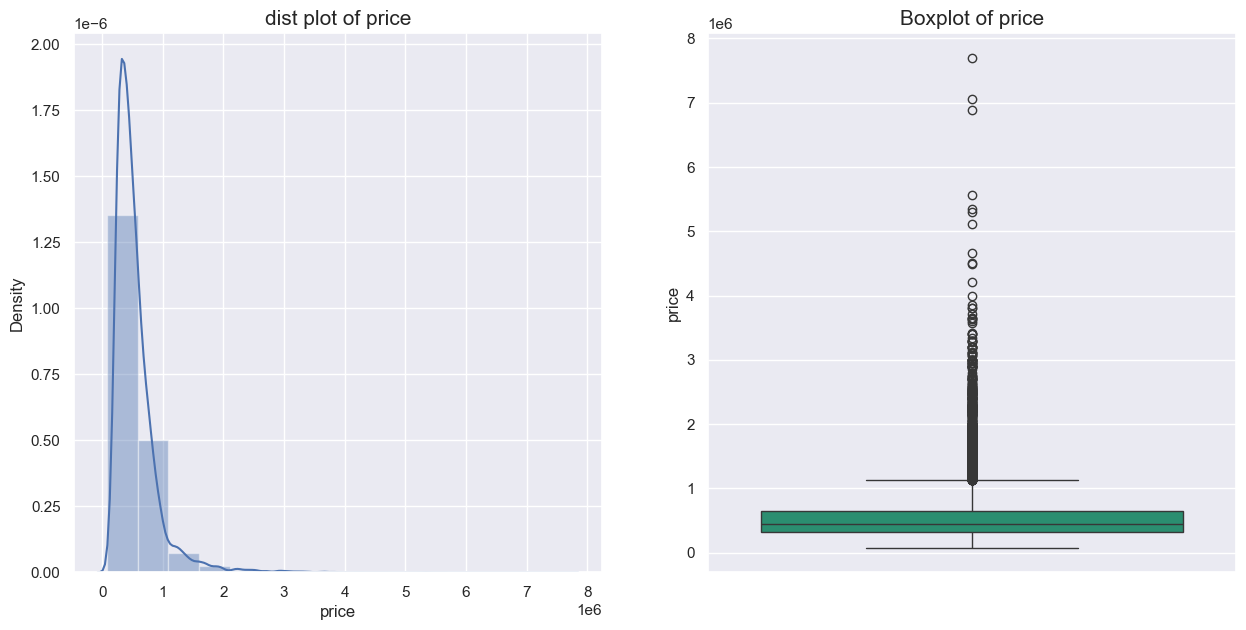

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


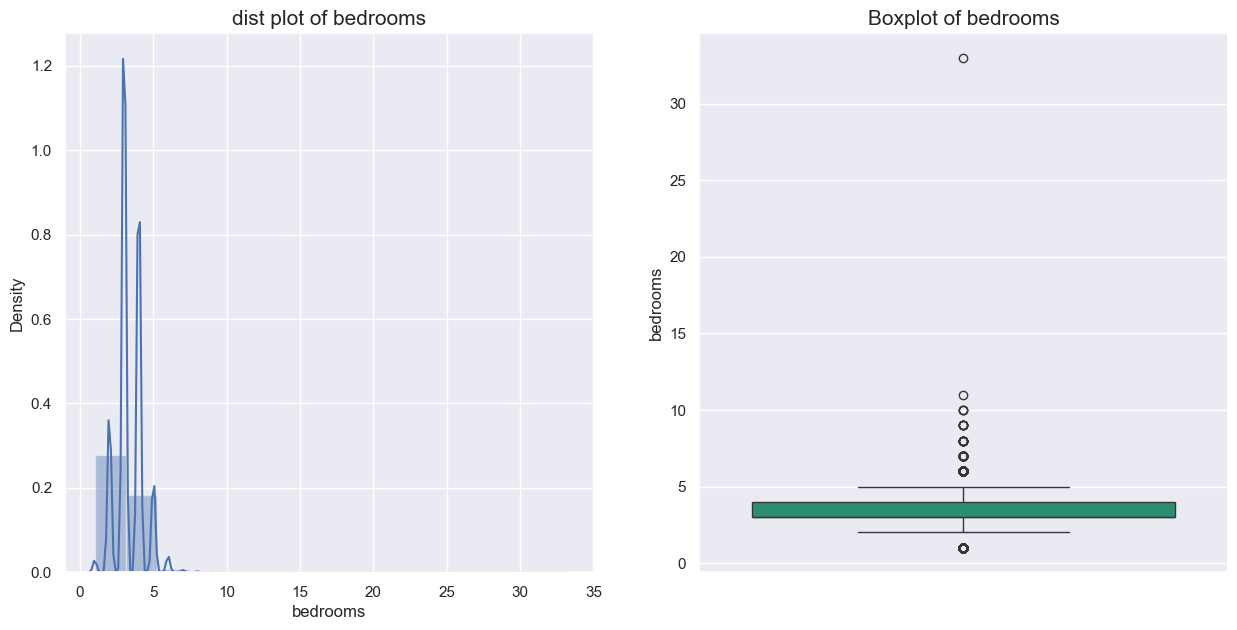

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


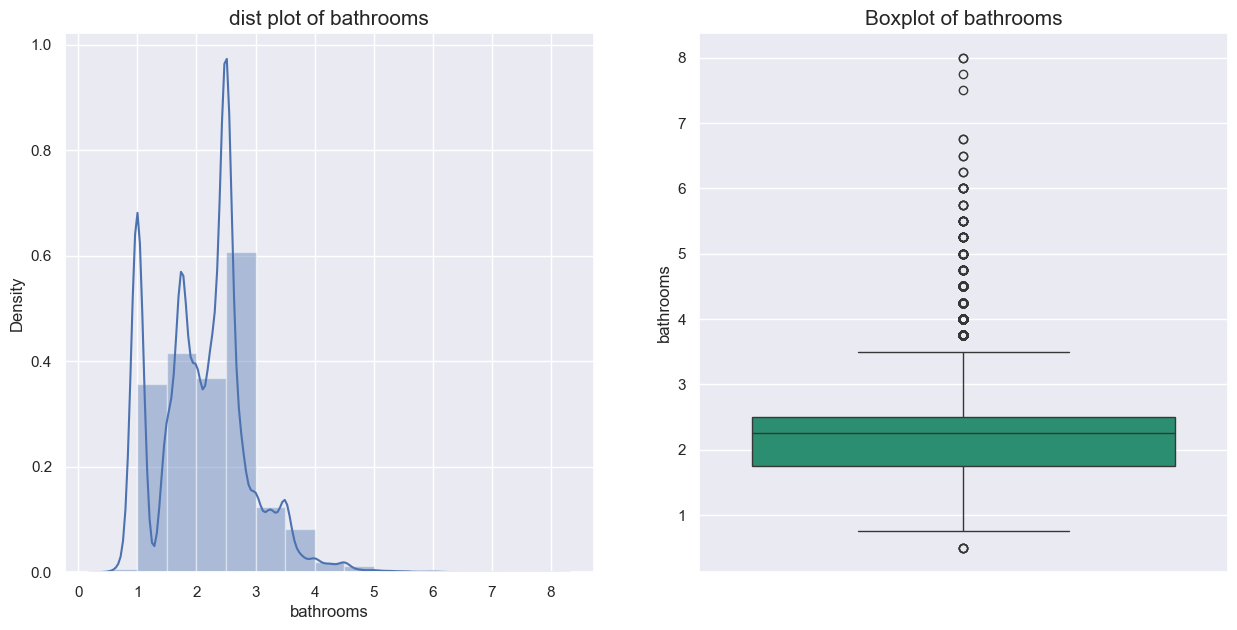

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


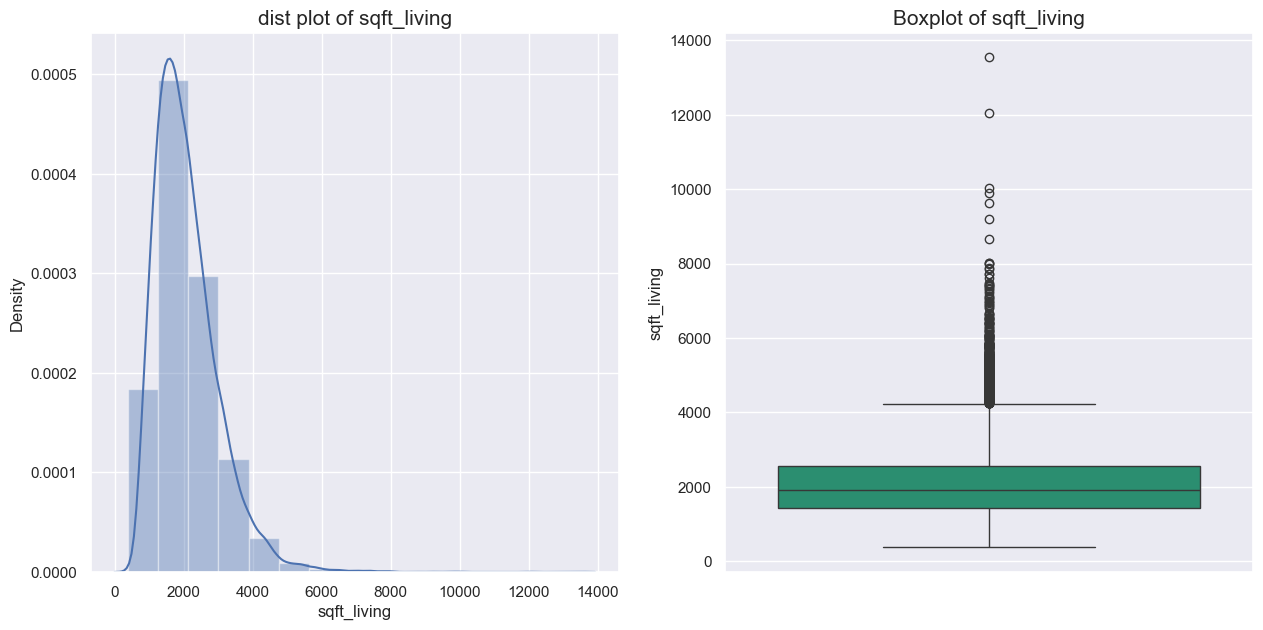

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


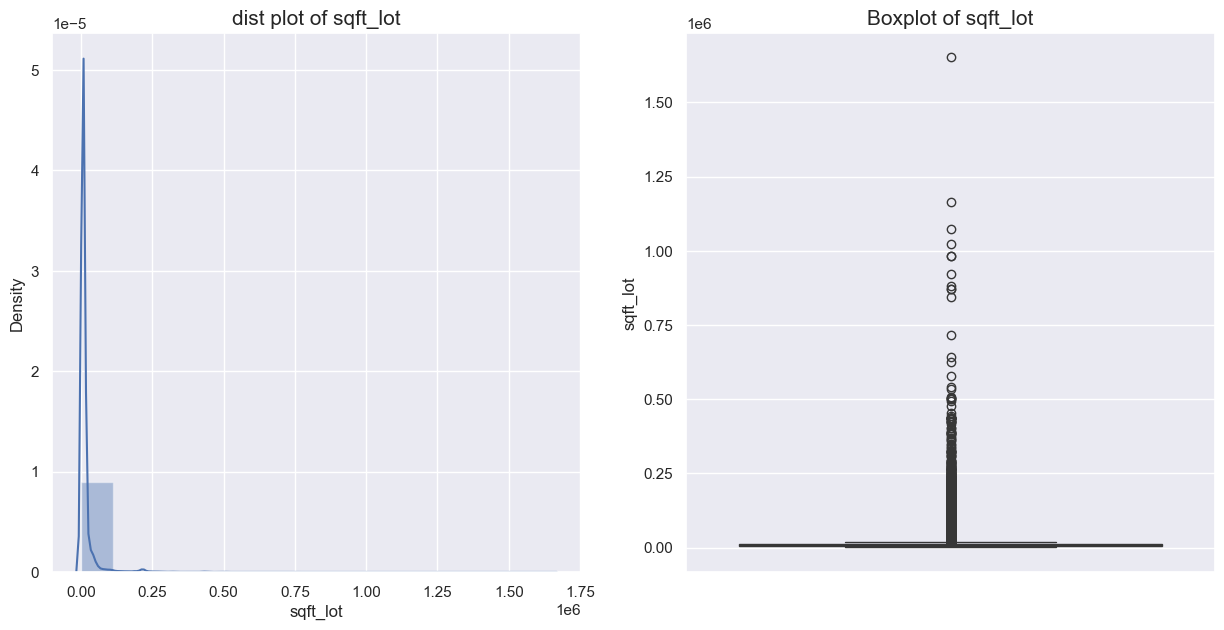

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


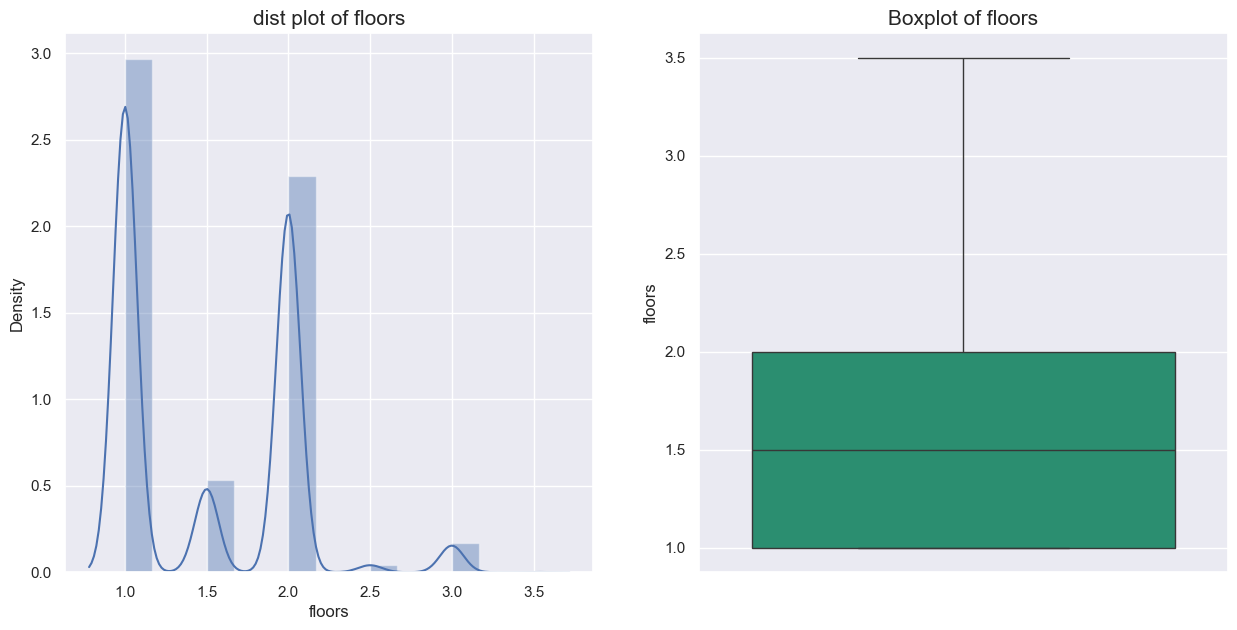

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


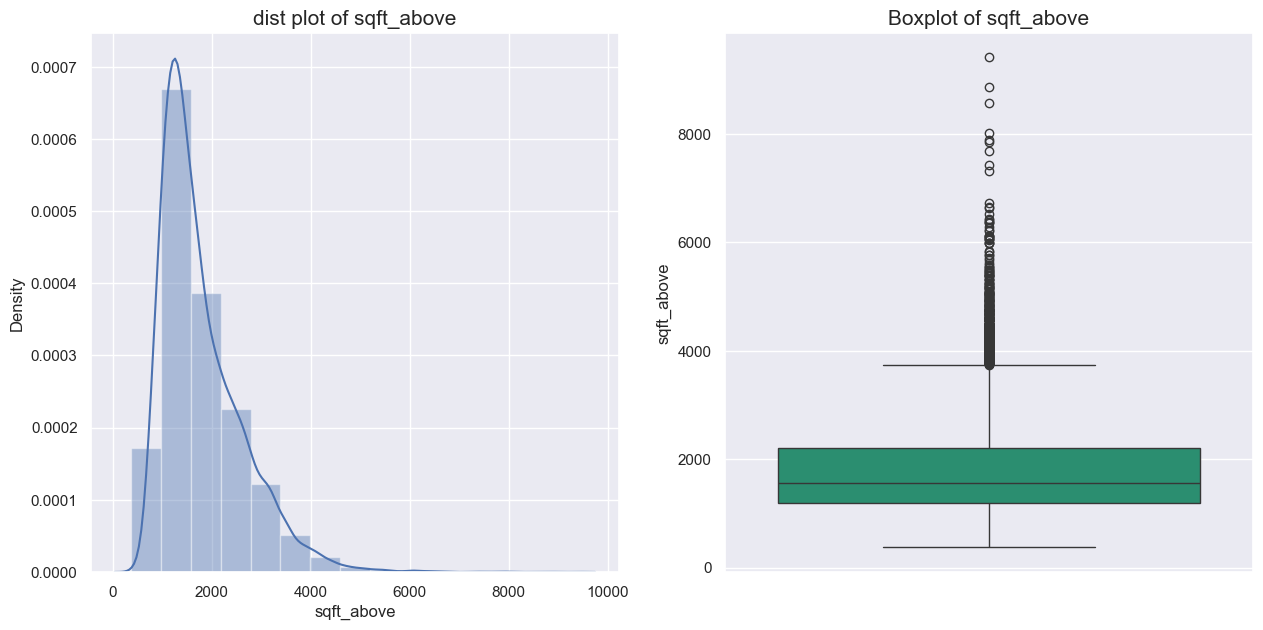

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


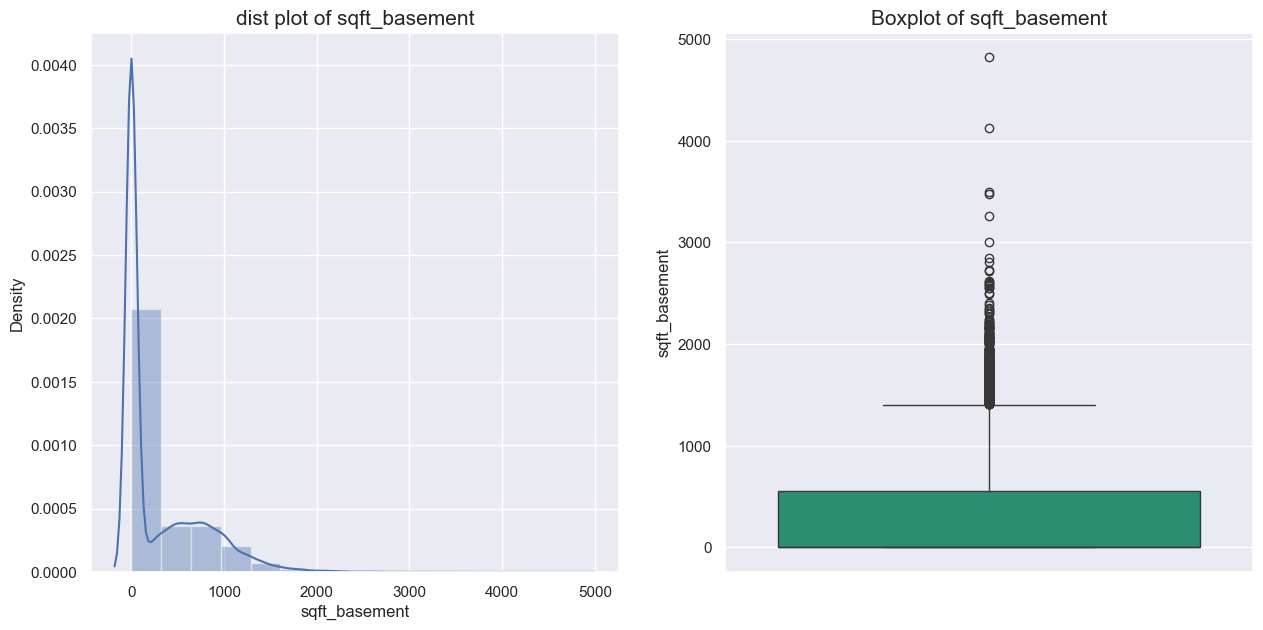

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


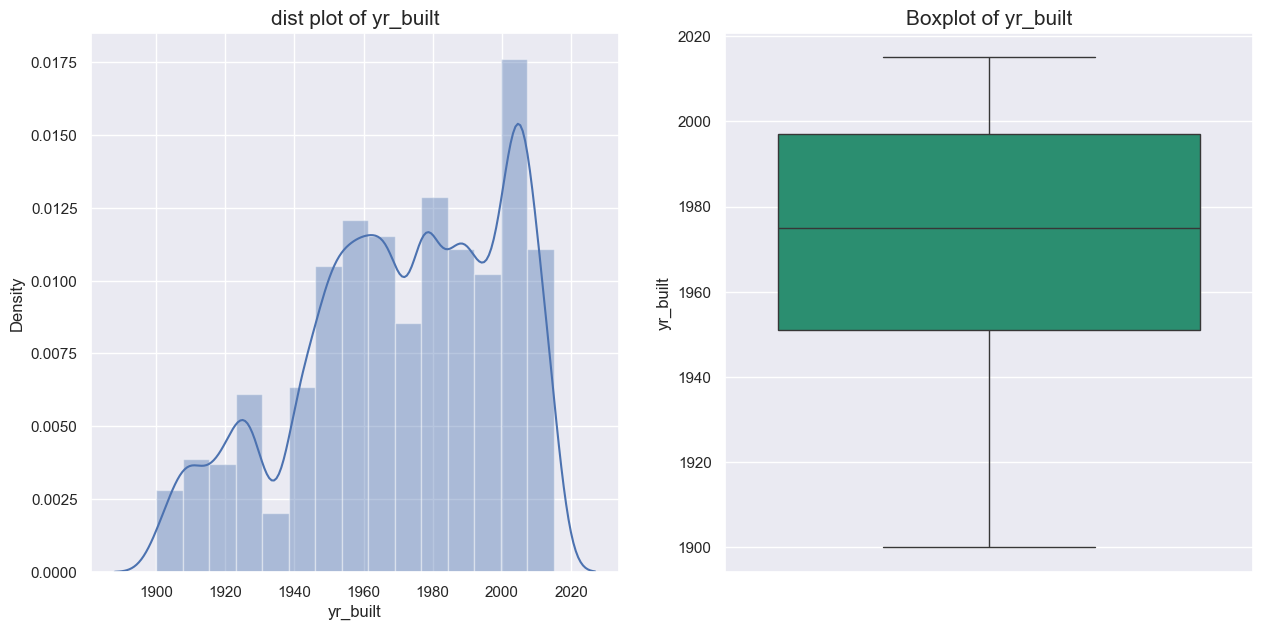

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


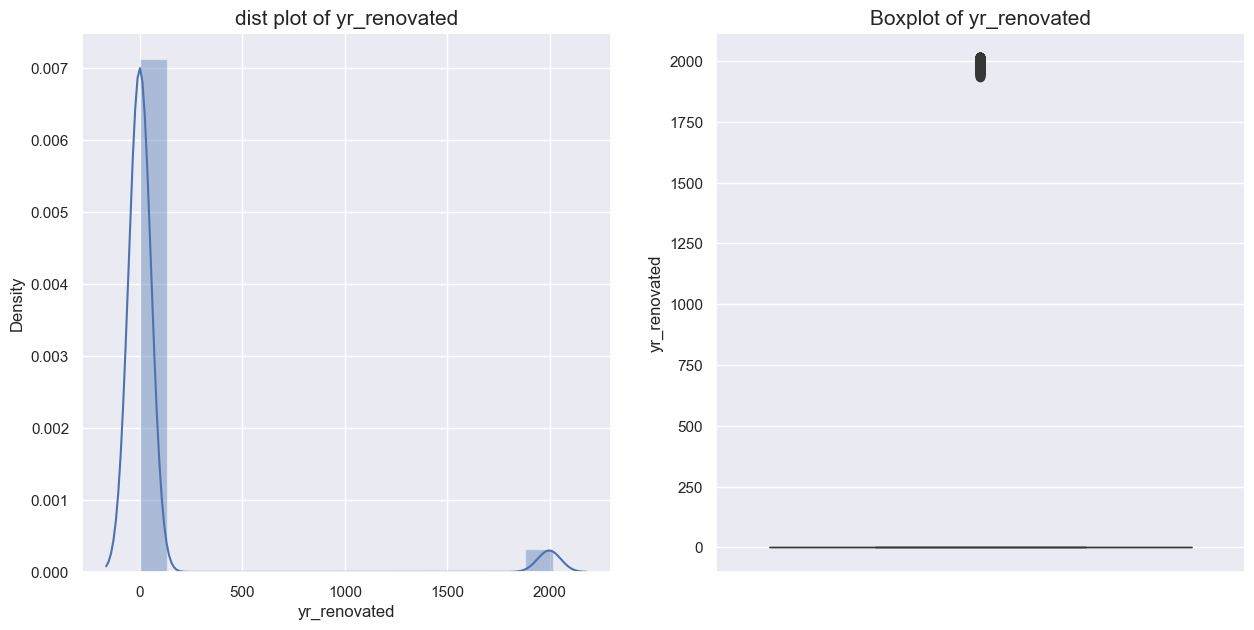

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


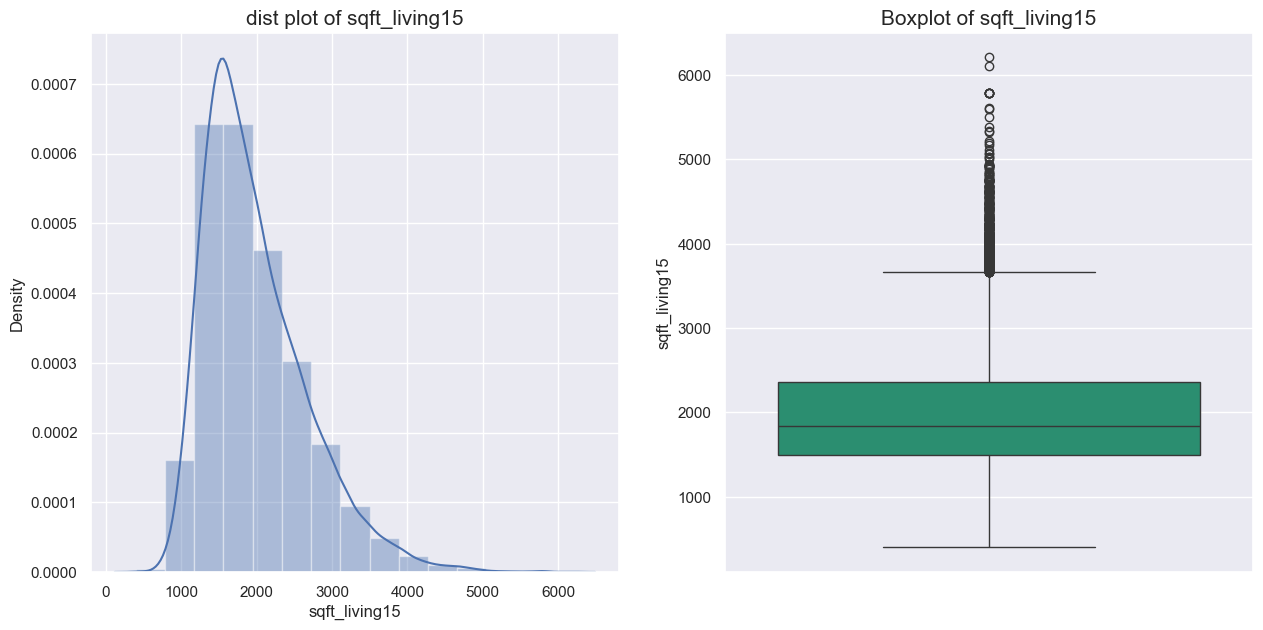

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


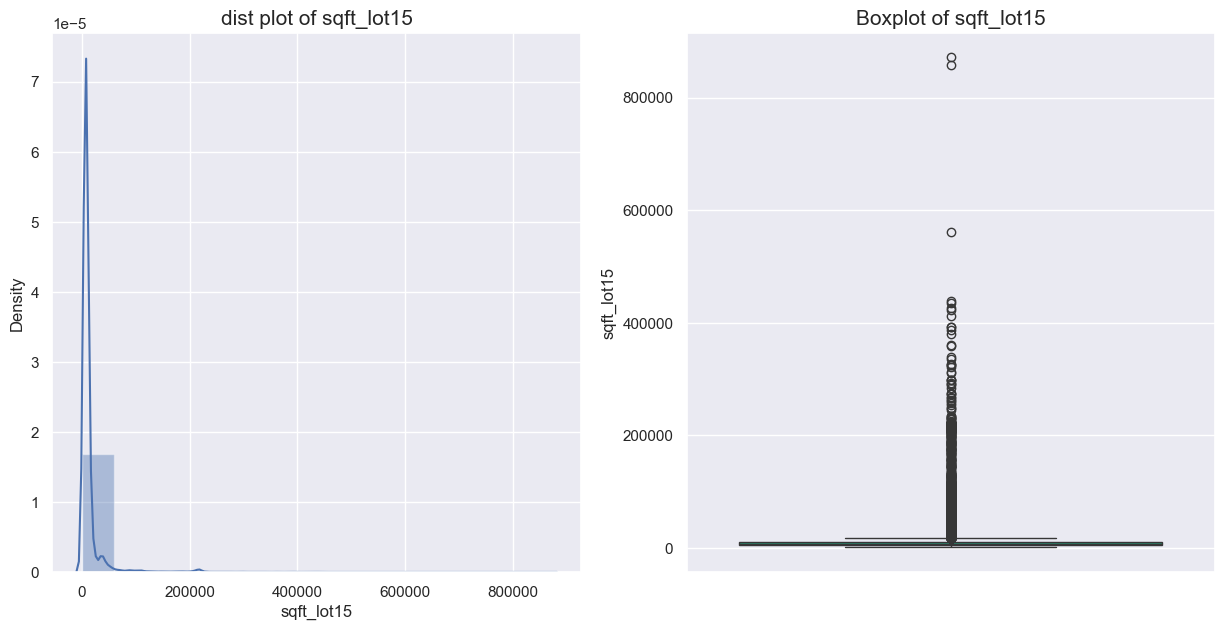

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\3792330012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")


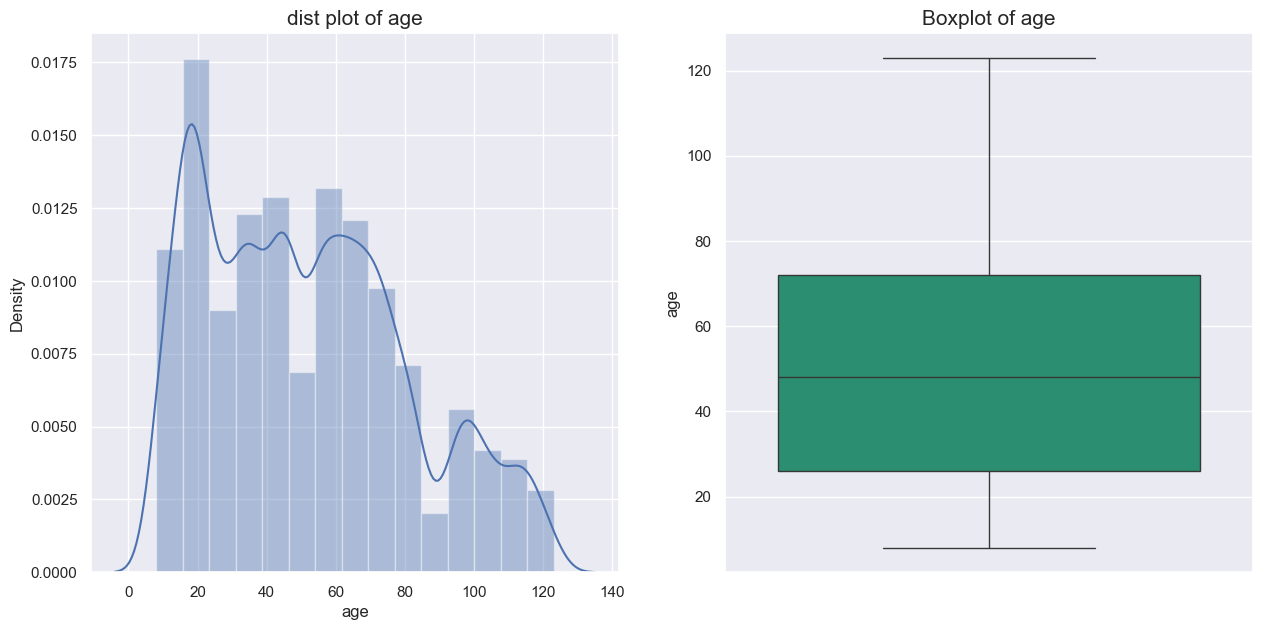

In [1585]:
for column in df.select_dtypes(include='number').columns.tolist() :
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.title('dist plot of '+column, fontsize=15)
    sns.distplot(df[column],bins=15)
    plt.subplot(1,2,2)
    plt.title('Boxplot of '+column, fontsize=15)
    sns.boxplot(data = df[column], palette="Dark2")
    plt.show()  

In [1586]:
df_capped=df.copy()

In [1587]:
df_capped["price"].quantile(0.75)

645000.0

In [1588]:
df_capped["price"].max()

7700000.0

In [1589]:
col_capped=df_capped.select_dtypes(include='number').columns.tolist()
col_capped

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15',
 'age']

In [1590]:
col_capped.remove('sqft_basement')

In [1591]:
col_capped.remove('yr_renovated')

In [1592]:
# for column in col_capped :
#     Q1 = df_capped[column].quantile(0.25)
#     Q3 = df_capped[column].quantile(0.75)
#     IQR = Q3 - Q1
#     max_limit = Q3 + (1.5 * IQR)
#     min_limit = Q1 - (1.5 * IQR) 
#     df_capped[column] = pd.DataFrame(np.where(df_capped[column] > max_limit, max_limit, 
#          (np.where(df_capped[column] < min_limit, min_limit, df_capped[column]))), columns=[column])

In [1593]:
Q1 = df_capped["price"].quantile(0.25)
Q3 = df_capped["price"].quantile(0.75)

# max_limit = Q3 + (1.5 * IQR)
# min_limit = Q1 - (1.5 * IQR)
# df_capped["price"] = pd.DataFrame(
#     np.where(
#         df_capped["price"] > max_limit,
#         max_limit,
#         (np.where(df_capped["price"] < min_limit, min_limit, df_capped["price"])),
#     ),
#     columns=["price"]
# )

In [1594]:
IQR = Q3 - Q1
IQR

323000.0

In [1595]:
max_limit = Q3 + (1.5 * IQR)
min_limit = Q1 - (1.5 * IQR)
min_limit

-162500.0

In [1596]:
max_limit

1129500.0

In [1597]:
df_capped["price"].iloc[1].item()

538000.0

In [1598]:
len(df_capped.index.to_list())

21600

In [1599]:
# new_price=list()
# for index in df_capped.index.to_list():
#     if df_capped["price"].loc[index].all() >= max_limit:
#         age1 = float(max_limit)
#     elif df_capped["price"].loc[index].all() <= min_limit:
#         age1 = float(min_limit)
#     else:
#         age1=df_capped["price"].loc[index]
#     new_price.append(age1)
# pass

In [1600]:
df_capped["price"].iloc[1]

538000.0

In [1601]:
# new_price = []

# for index in range(len(df_capped.index)):
#     price = df_capped["price"].iloc[index]

#     if price >= max_limit:
#         new_price.append(float(max_limit))
#     elif price <= min_limit:
#         new_price.append(float(min_limit))
#     else:
#         new_price.append(float(price))

In [1602]:
# df_capped["price"] = pd.DataFrame(new_price, index=df_capped.index)

In [1603]:
def capped(column):
    Q1 = df_capped[column].quantile(0.25)
    Q3 = df_capped[column].quantile(0.75)
    IQR = Q3 - Q1
    max_limit = Q3 + (1.5 * IQR)
    min_limit = Q1 - (1.5 * IQR)

    new_price = []

    for index in range(len(df_capped.index)):
        price = df_capped[column].iloc[index]

        if price >= max_limit:
            new_price.append(float(max_limit))
        elif price <= min_limit:
            new_price.append(float(min_limit))
        else:
            new_price.append(float(price))

    df_capped[column] = pd.DataFrame(new_price, index=df_capped.index)
    return df_capped[column]

## Capped and Plots

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


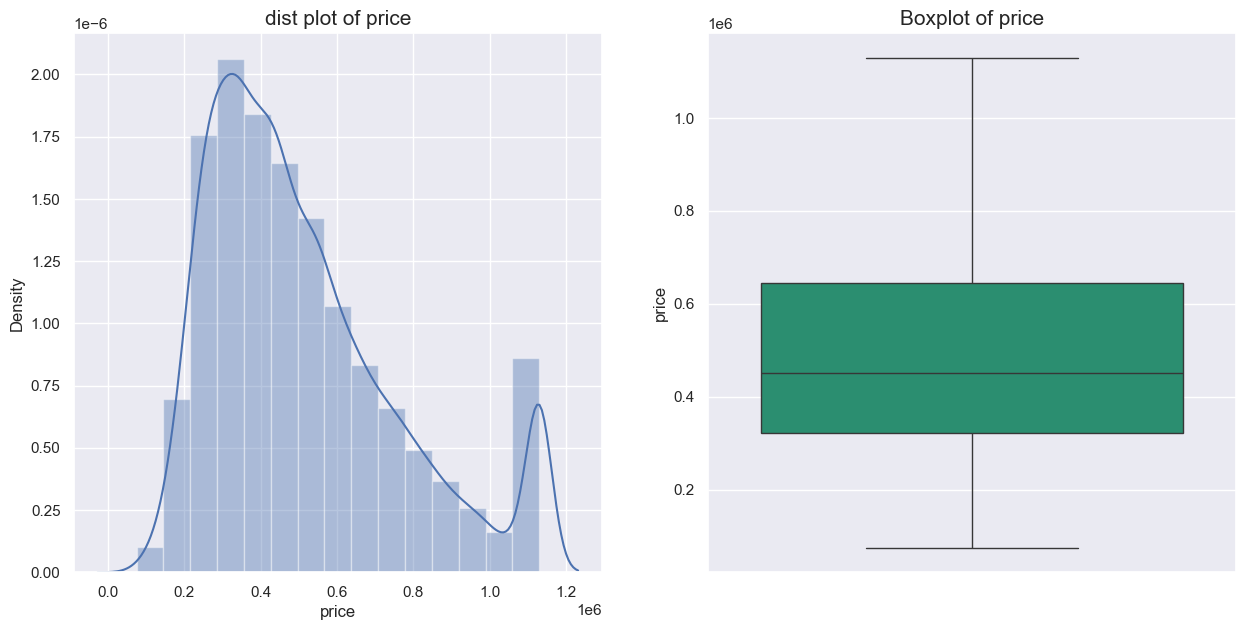

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


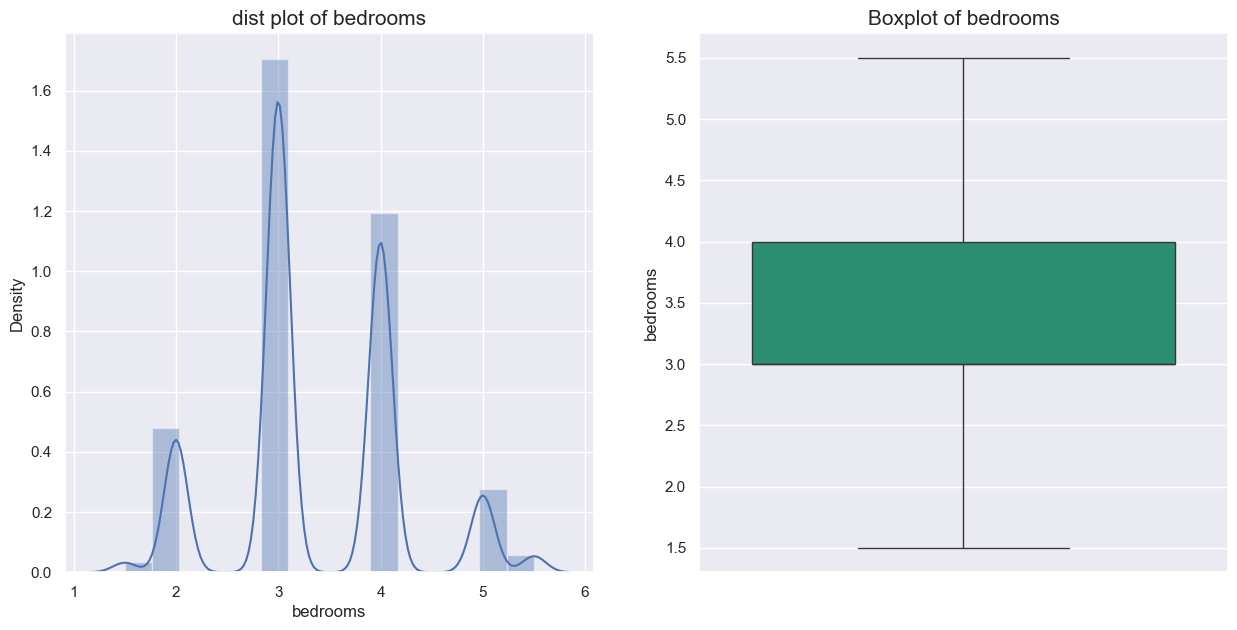

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


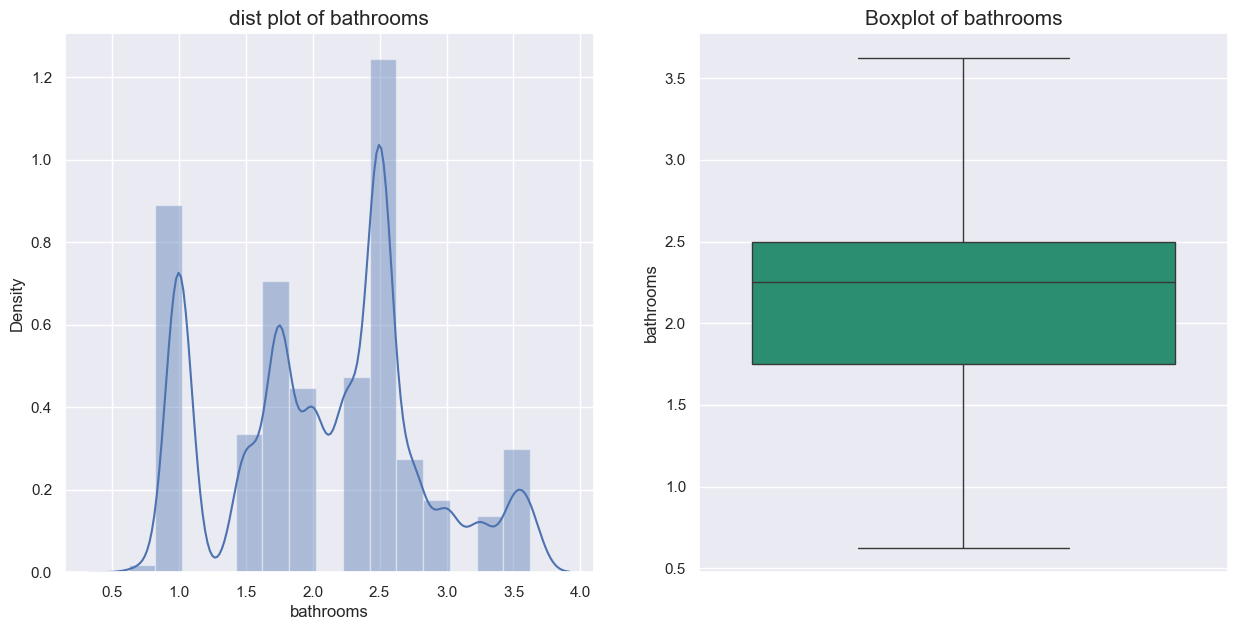

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


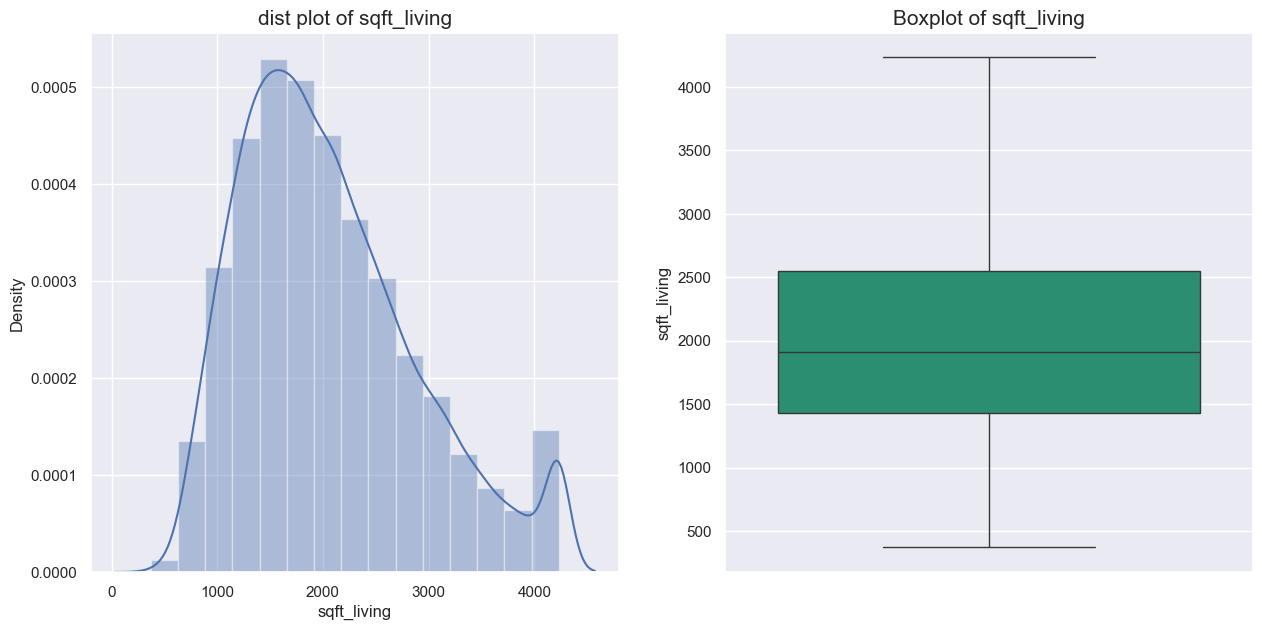

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


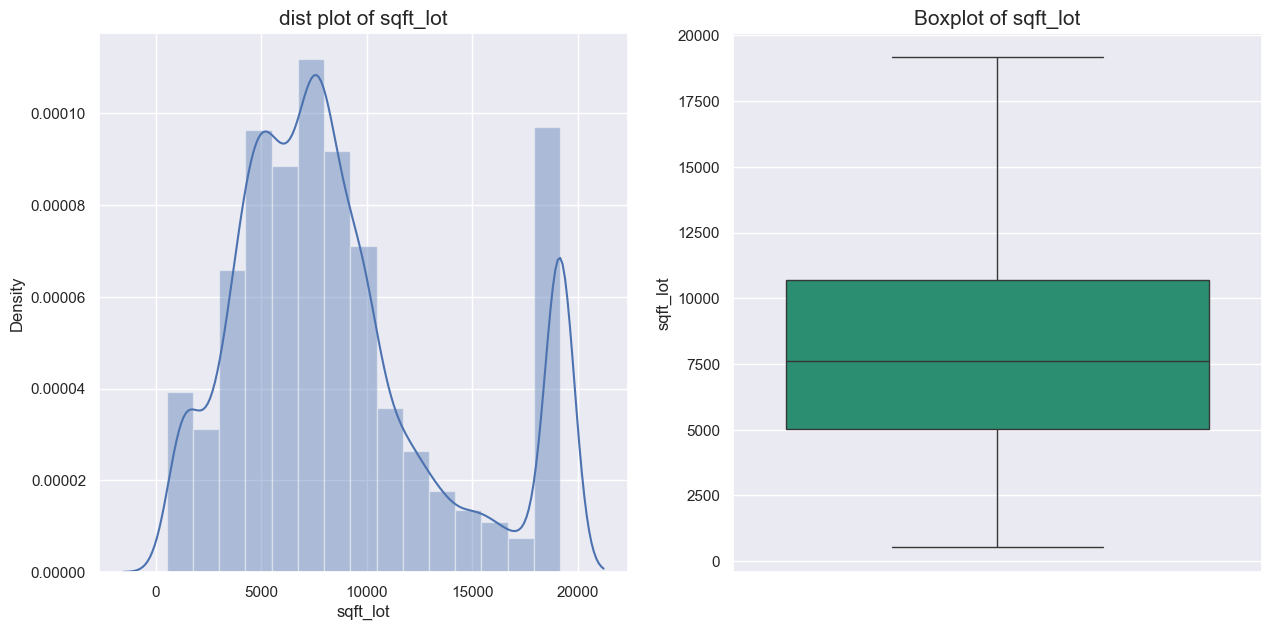

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


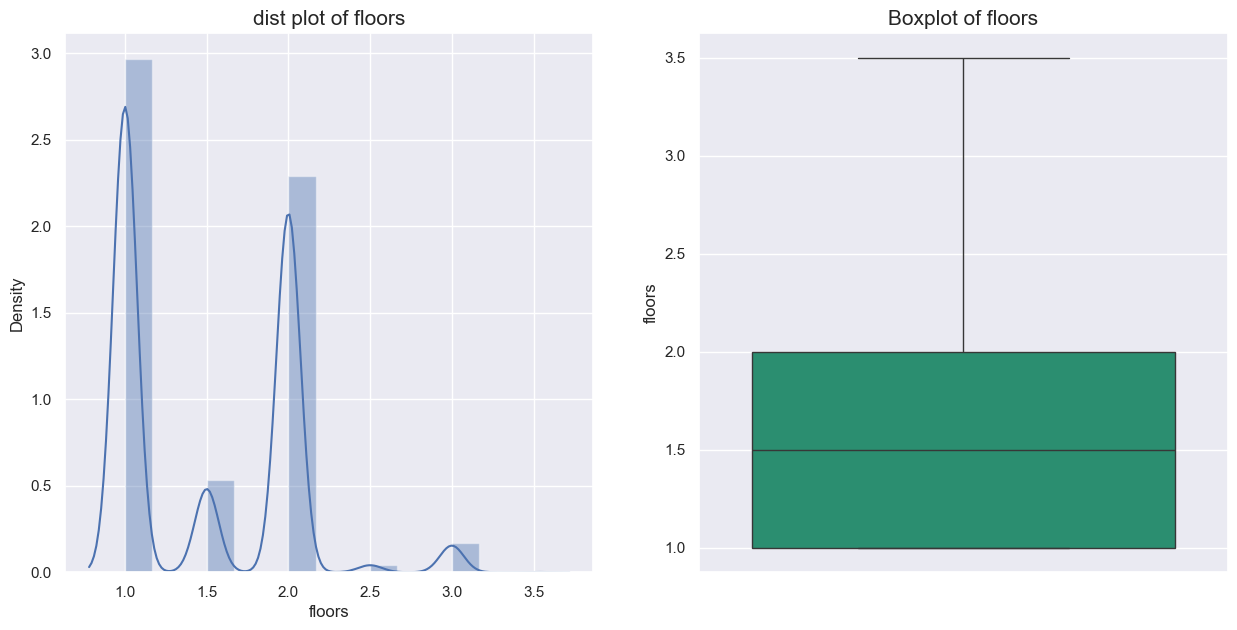

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


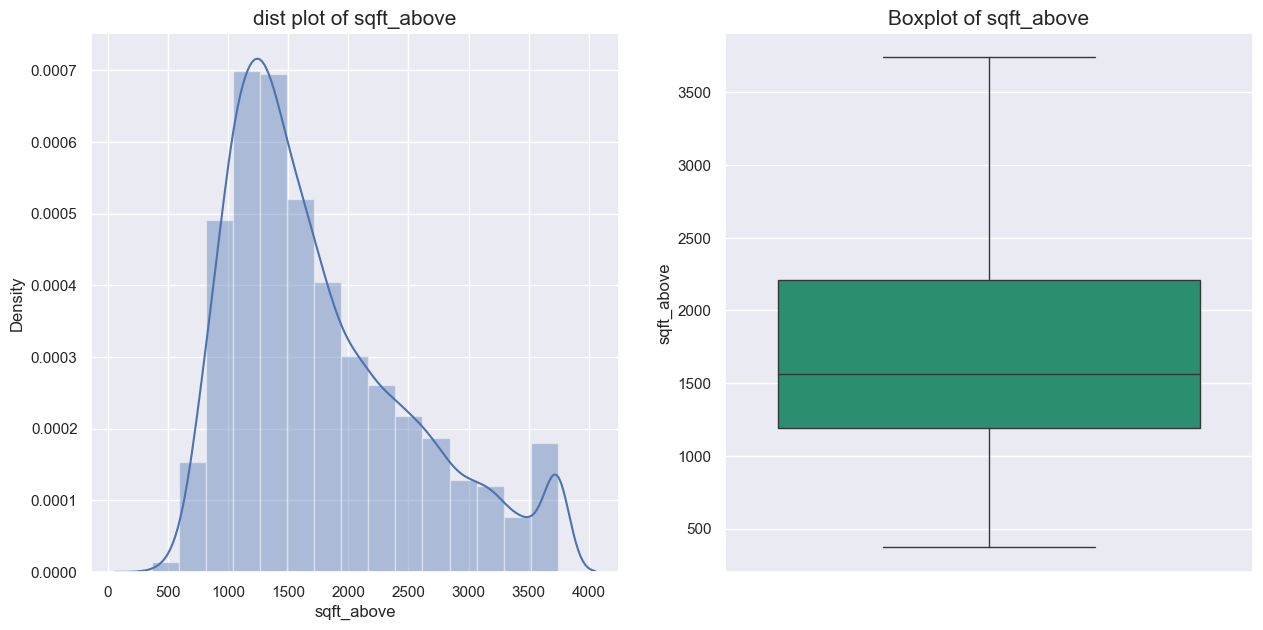

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


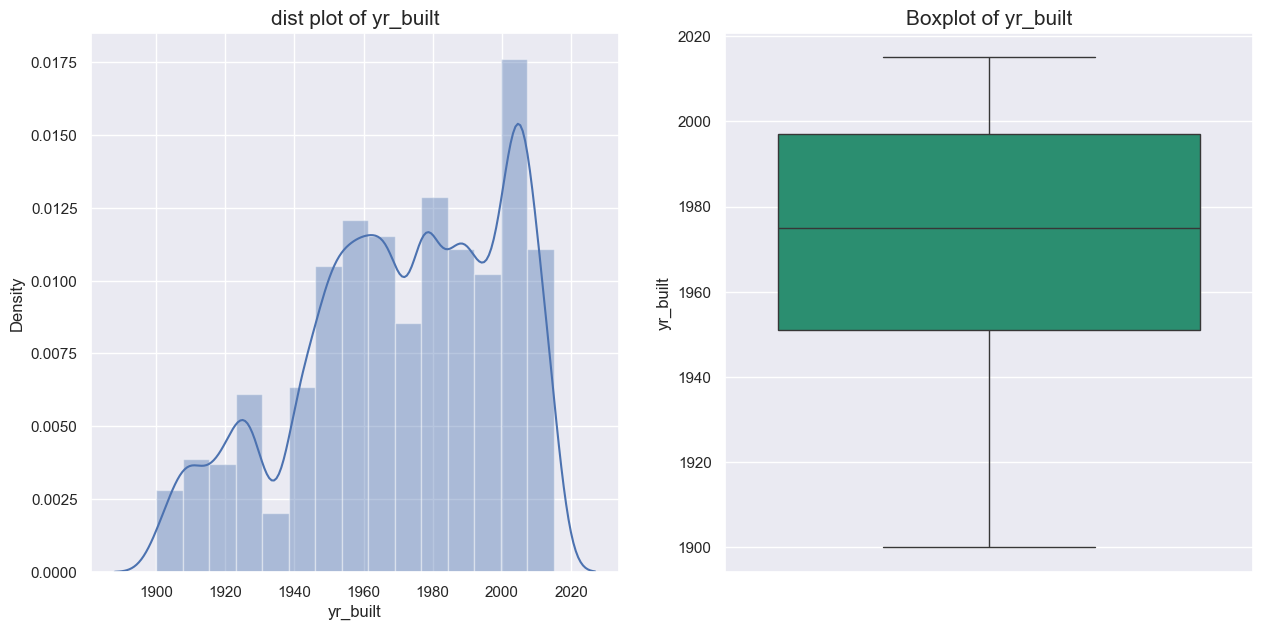

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


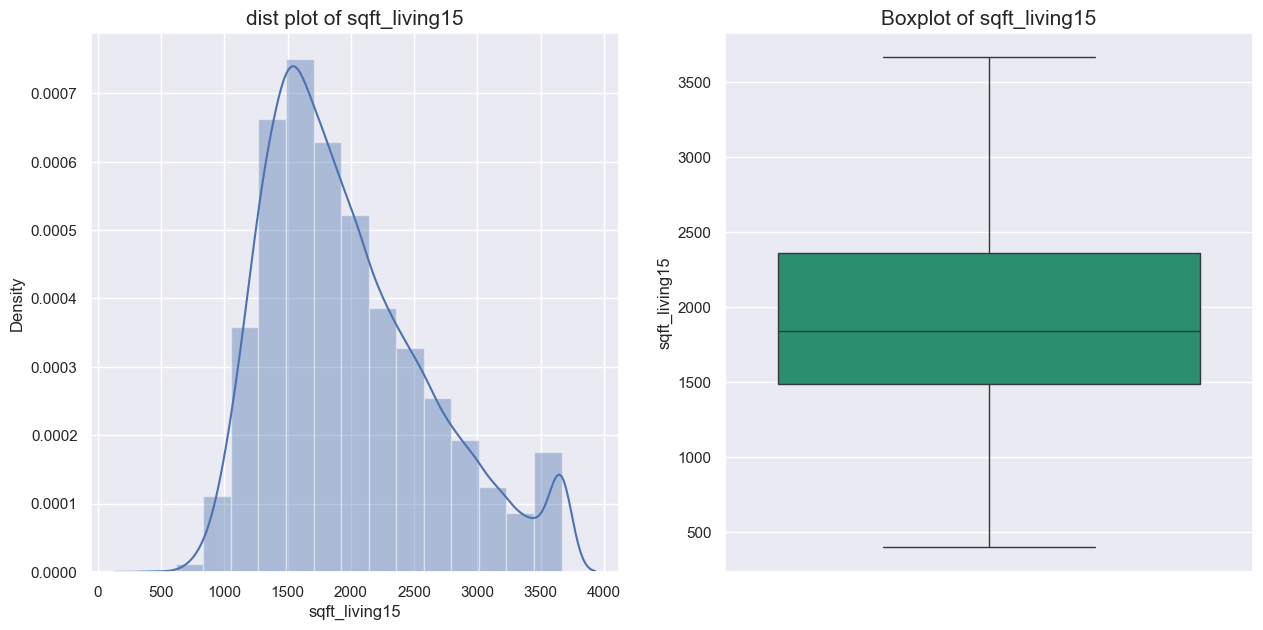

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


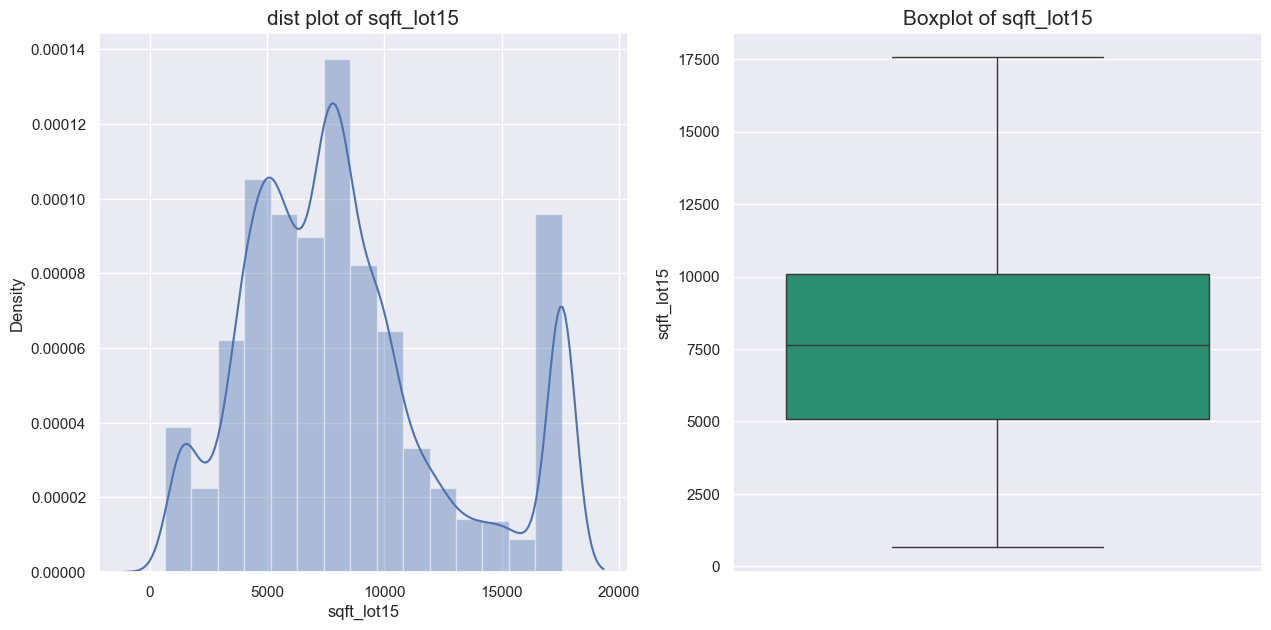

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column],bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\2766181266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


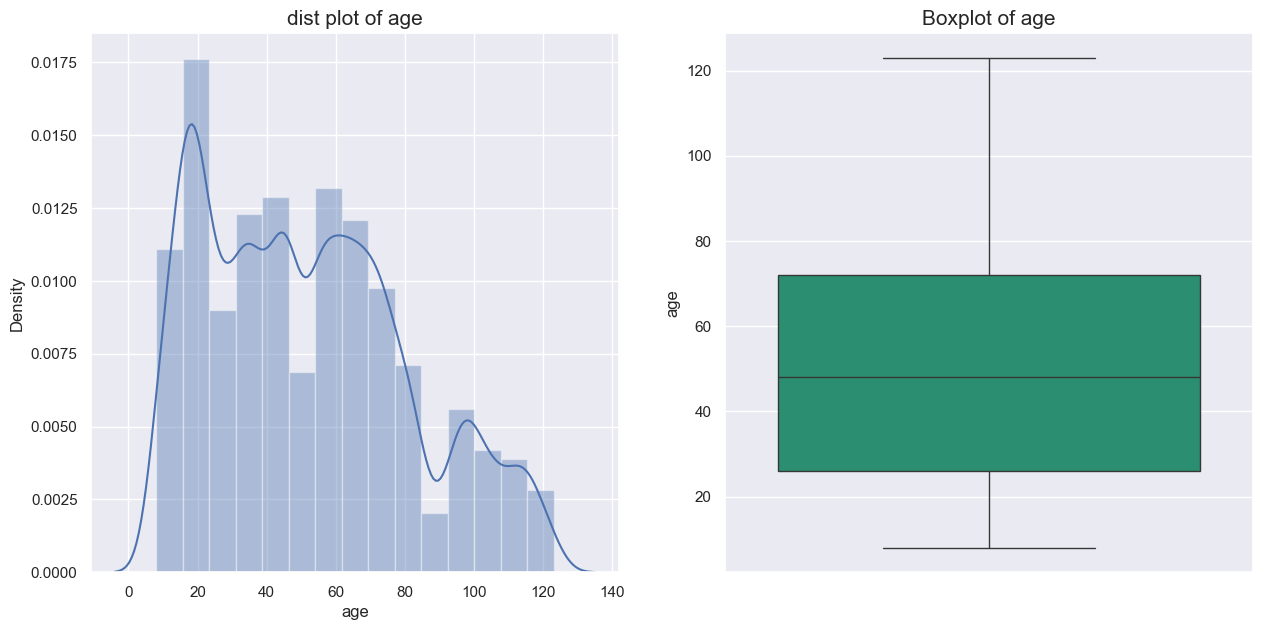

In [1604]:
for column in col_capped :
    capped(column)
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.title('dist plot of '+column, fontsize=15)
    sns.distplot(df_capped[column],bins=15)
    plt.subplot(1,2,2)
    plt.title('Boxplot of '+column, fontsize=15)
    sns.boxplot(data = df_capped[column], palette="Dark2")
    plt.show()  

## Comparison before and after capped

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


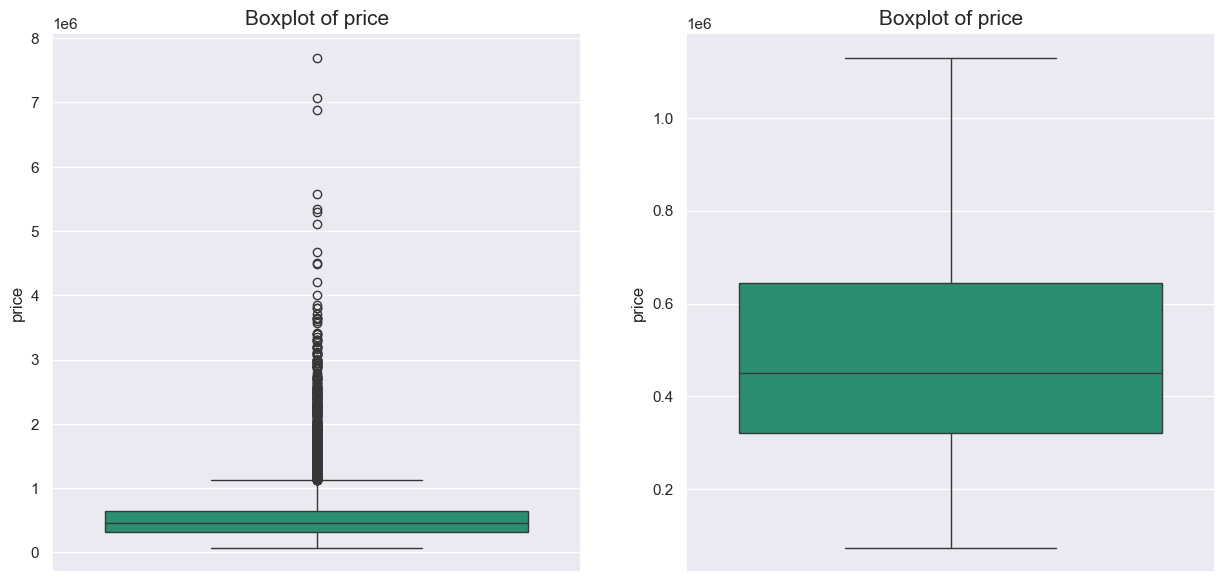

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


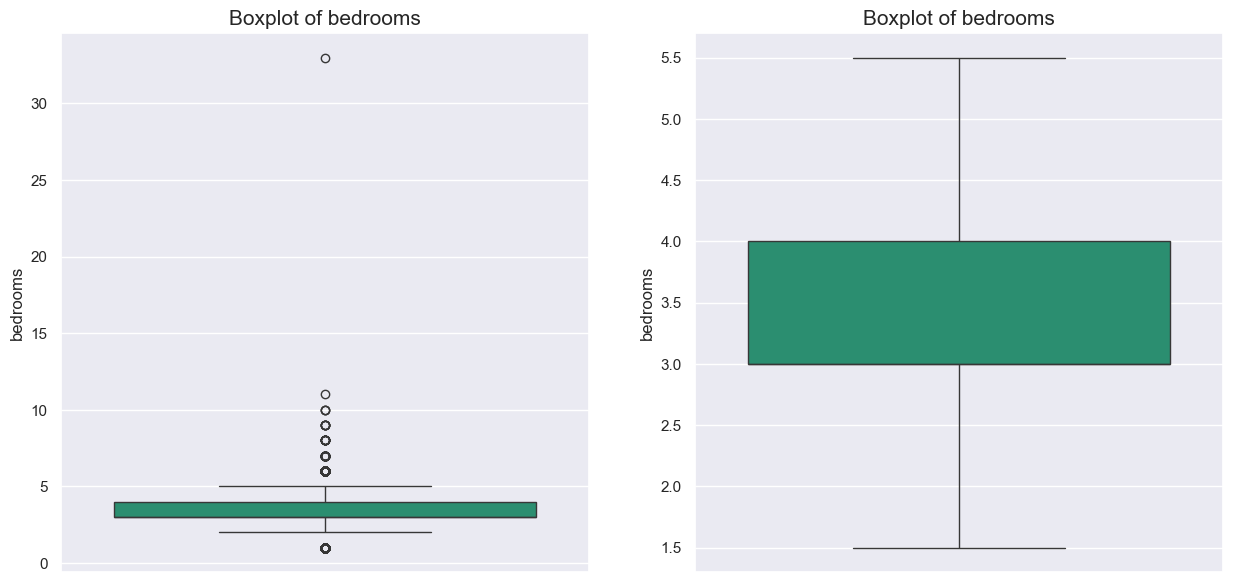

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


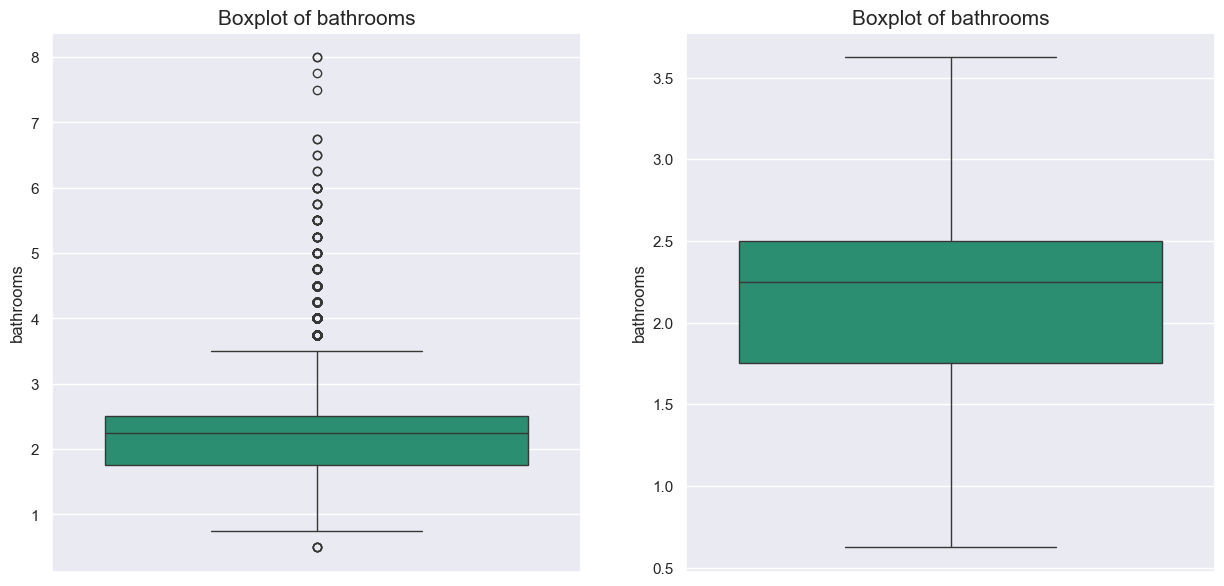

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


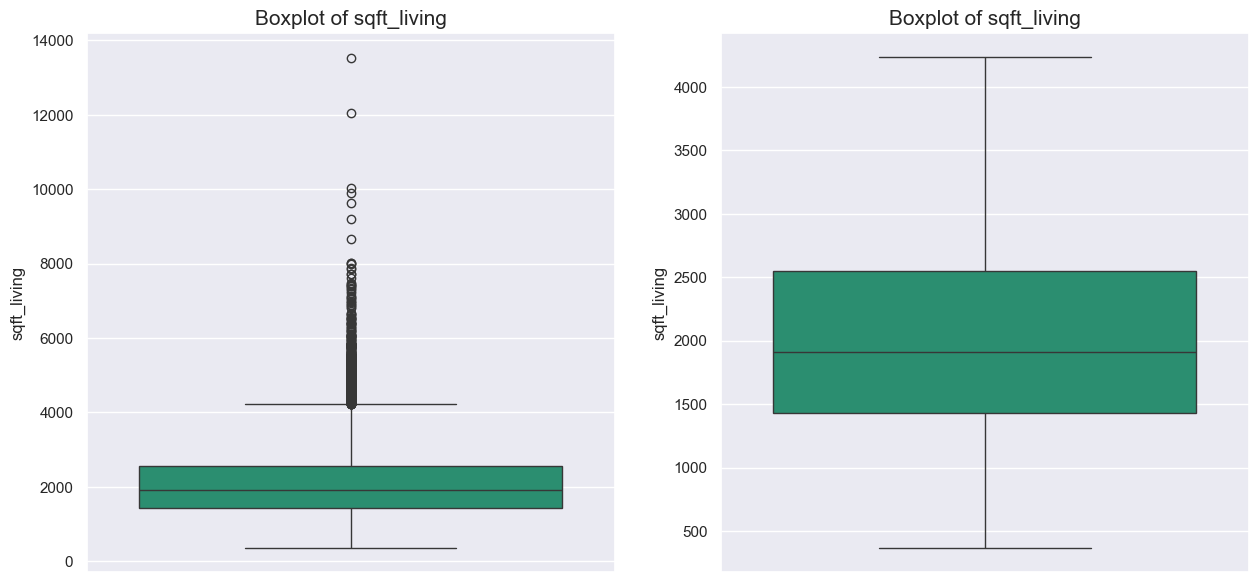

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


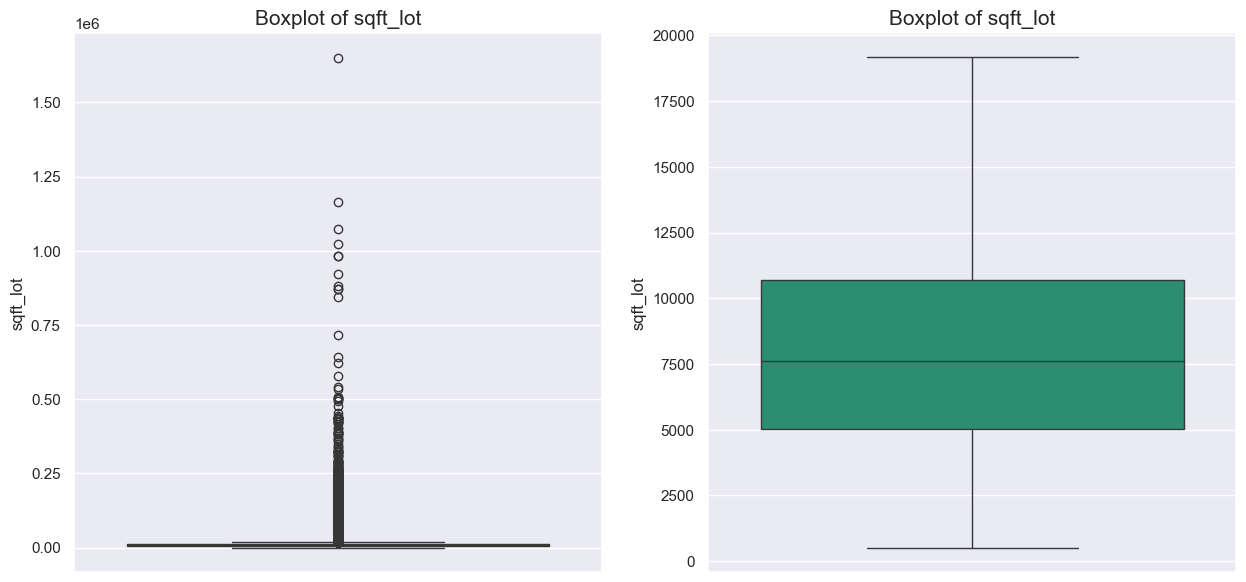

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


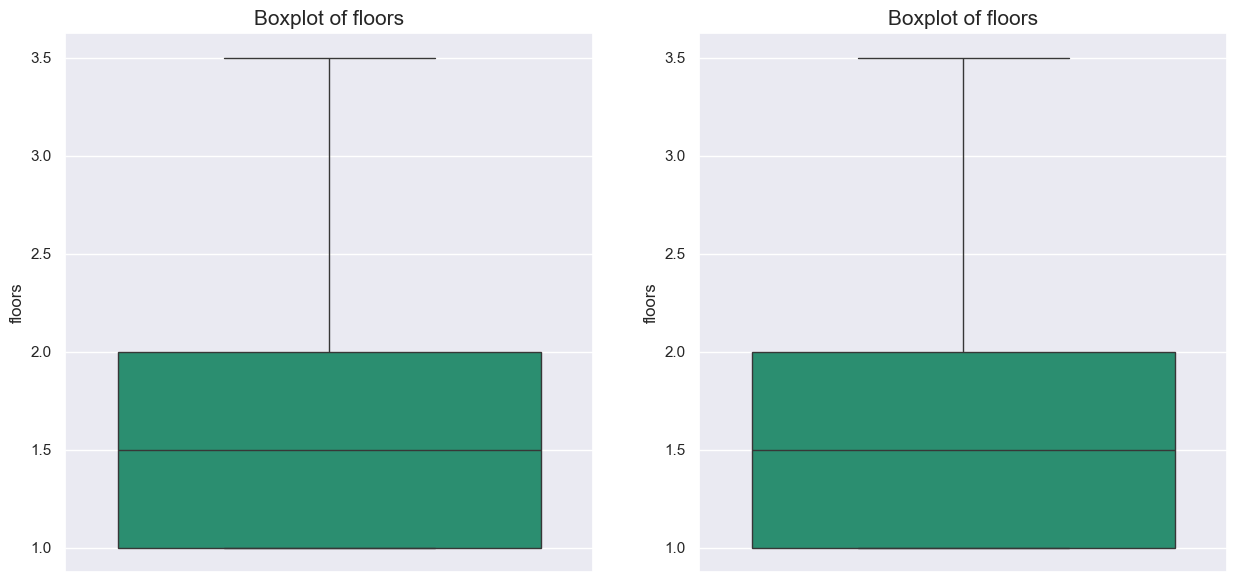

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


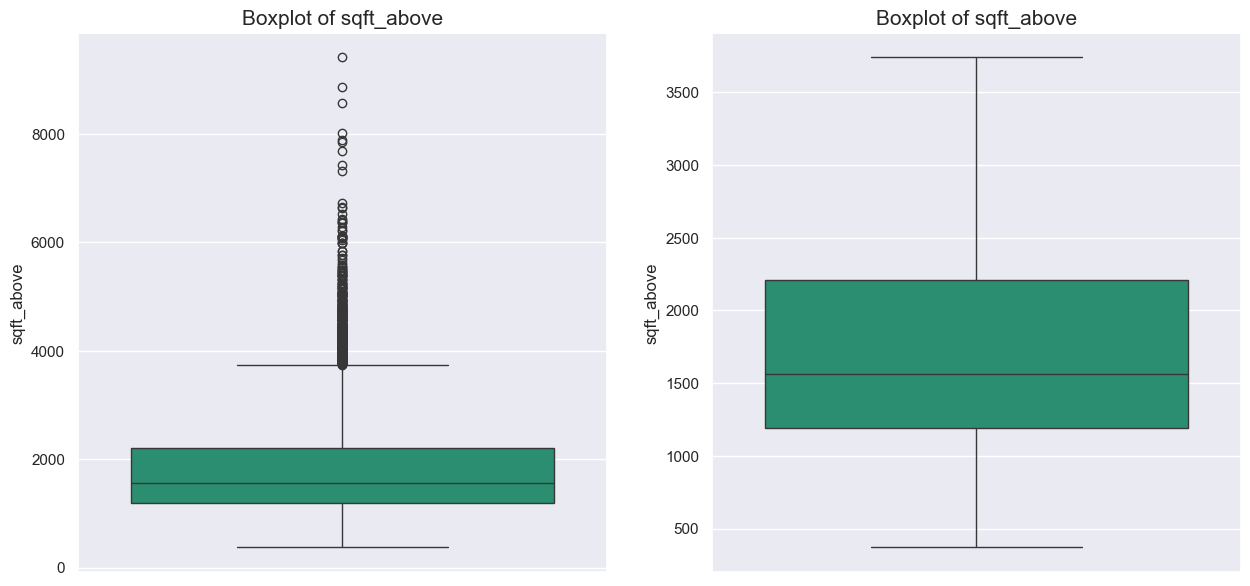

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


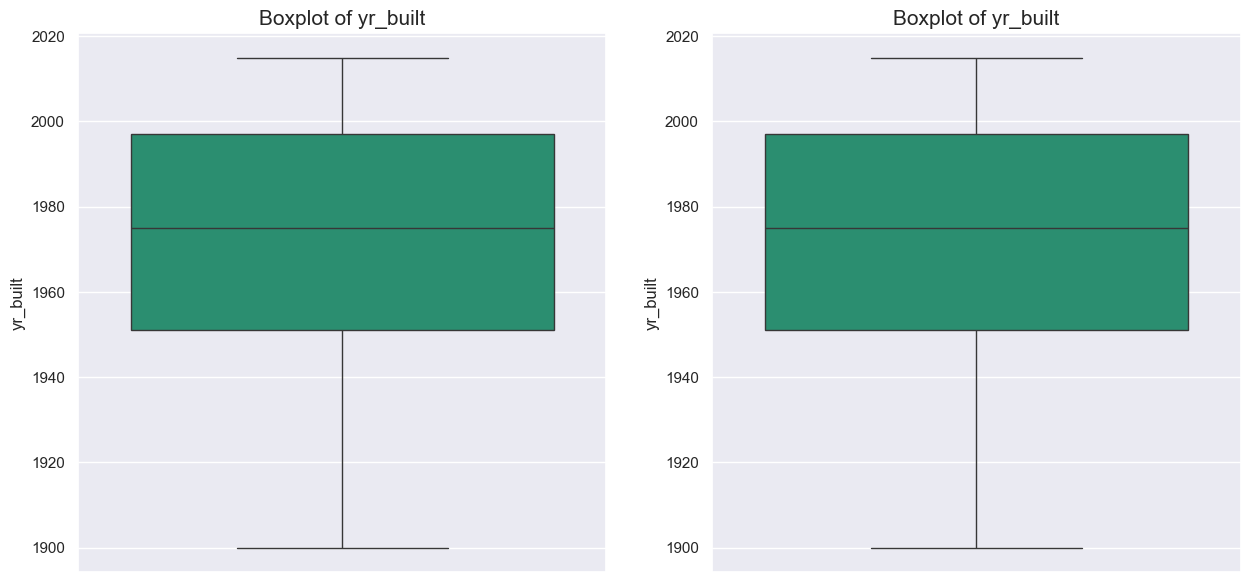

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


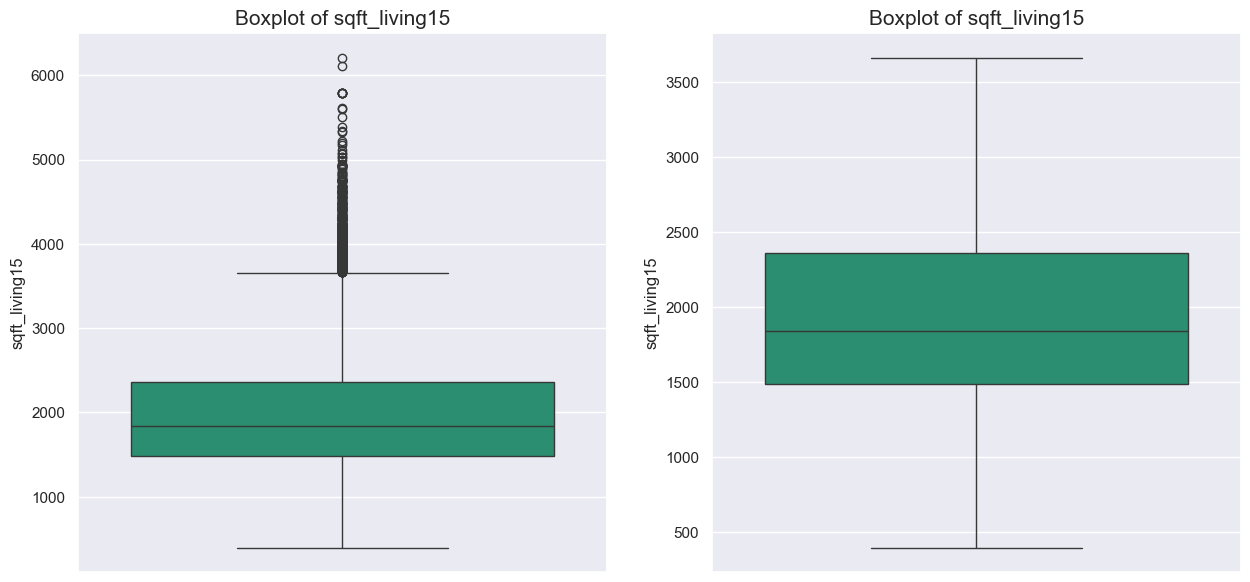

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


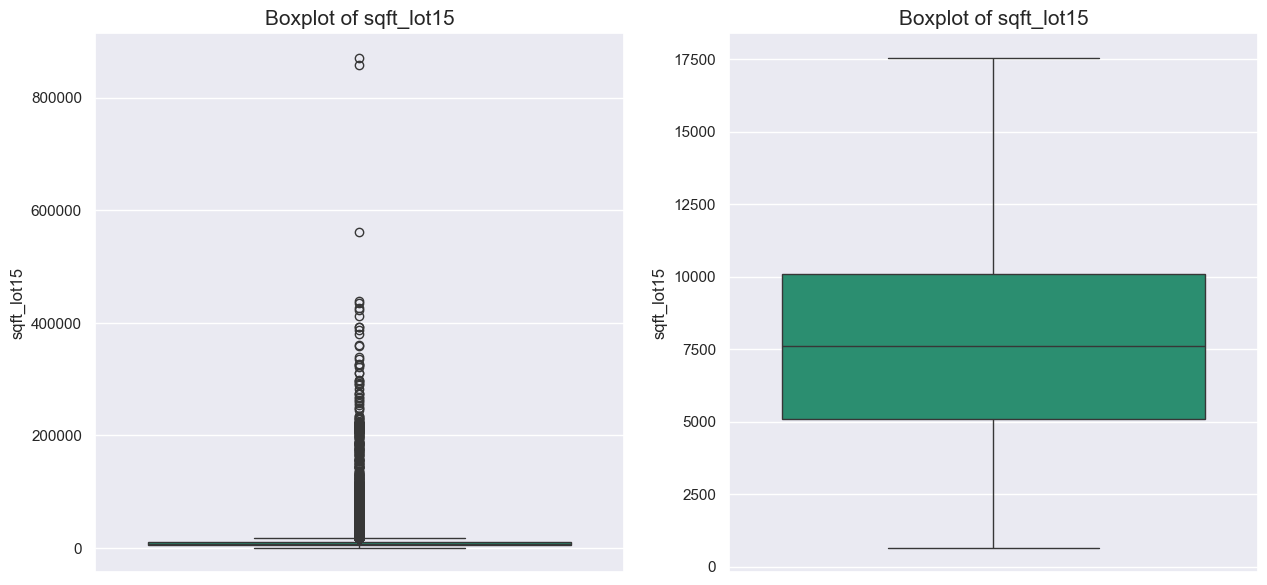

C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_19044\1386442195.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_capped[column], palette="Dark2")


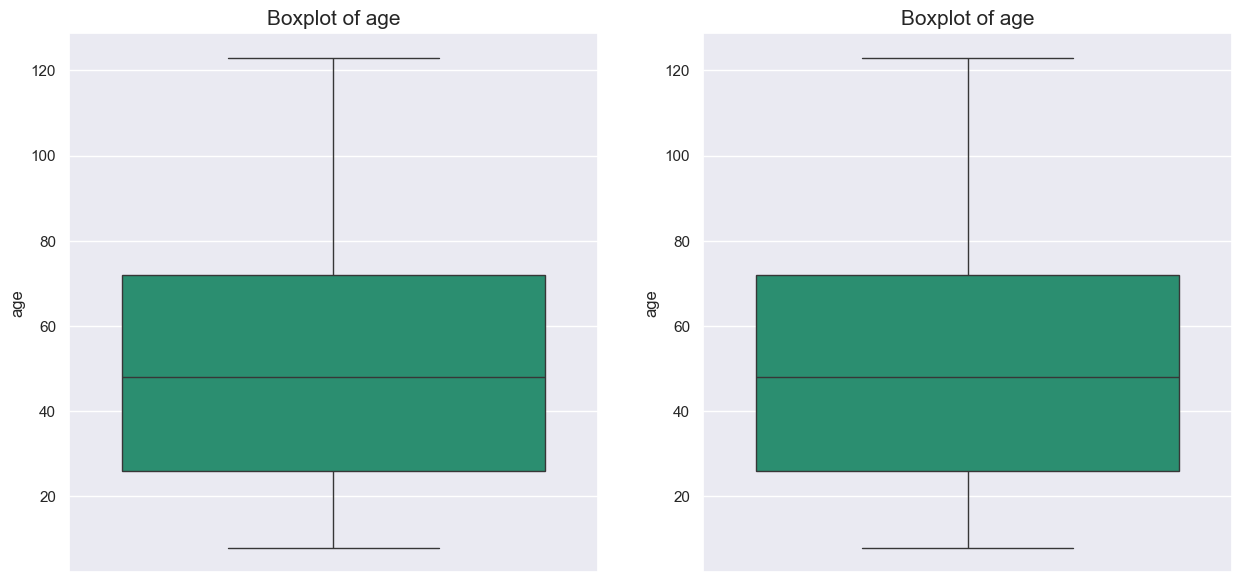

In [1605]:
for column in col_capped :
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.title('Boxplot of '+column, fontsize=15)
    sns.boxplot(data = df[column], palette="Dark2")
    plt.subplot(1,2,2)
    plt.title('Boxplot of '+column, fontsize=15)
    sns.boxplot(data = df_capped[column], palette="Dark2")
    plt.show()  